# Predicting Water Potability Using Machine Learning

In this project, I use chemical and physical water quality features to predict whether water is safe for human consumption. This is a binary classification problem, and I compare logistic regression with a neural-network-based classifier (MLP) to understand whether a more flexible model improves performance.


The entire project will be broken down in the following steps:


1.   Libraries
2.   Dataset
3.   Exploratory Data Analysis
4.   Data Cleaning
5.   Train/Test Split
6.   Baseline Model — Logistic Regression
7.   Neural Network Classifier — MLPClassifier
8.   Decision Tree
9.   Compare All Model Results
10.  Confusion Matrices + ROC Curves
11.  Interpretations
12.  Conclusion

As you can see this imitates the traditional ML workflow we went over in the begining of the course.

# Import Libraries

In [15]:
# The following libraries are imported for this project, organized by their primary use case for clarity
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

#Dataset

In [16]:
# Here, we upload the dataset we will be working with, using it to train our mdoels and test them
# Make sure to upload 'water_potability.csv' to your Colab environment or provide the correct path

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/water_potability.csv") # Assumes file is in the root of My Drive
df.head(), df.shape

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
 0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
 1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
 2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
 3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
 4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   
 
    Organic_carbon  Trihalomethanes  Turbidity  Potability  
 0       10.379783        86.990970   2.963135           0  
 1       15.180013        56.329076   4.500656           0  
 2       16.868637        66.420093   3.055934           0  
 3       18.436524       100.341674   4.628771           0  
 4       11.558279        31.997993   4.075075           0  ,
 (3276, 10))

# Exploratory Data Analysis


### Summary Statistics






In [17]:
# Here we compute the summary statistics of this dataset
# This will give us an idea of the raw data looks like
df.describe()



,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


### Missing values

In [18]:
# This will identify all the missing values in the dataset
df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


### Plots

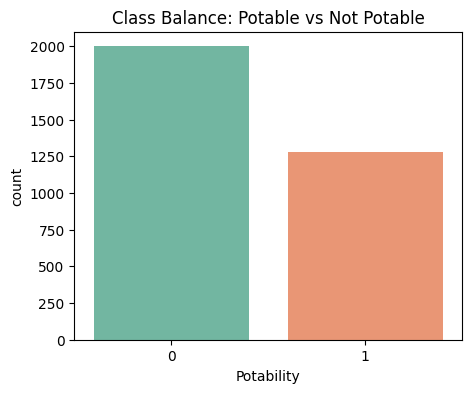

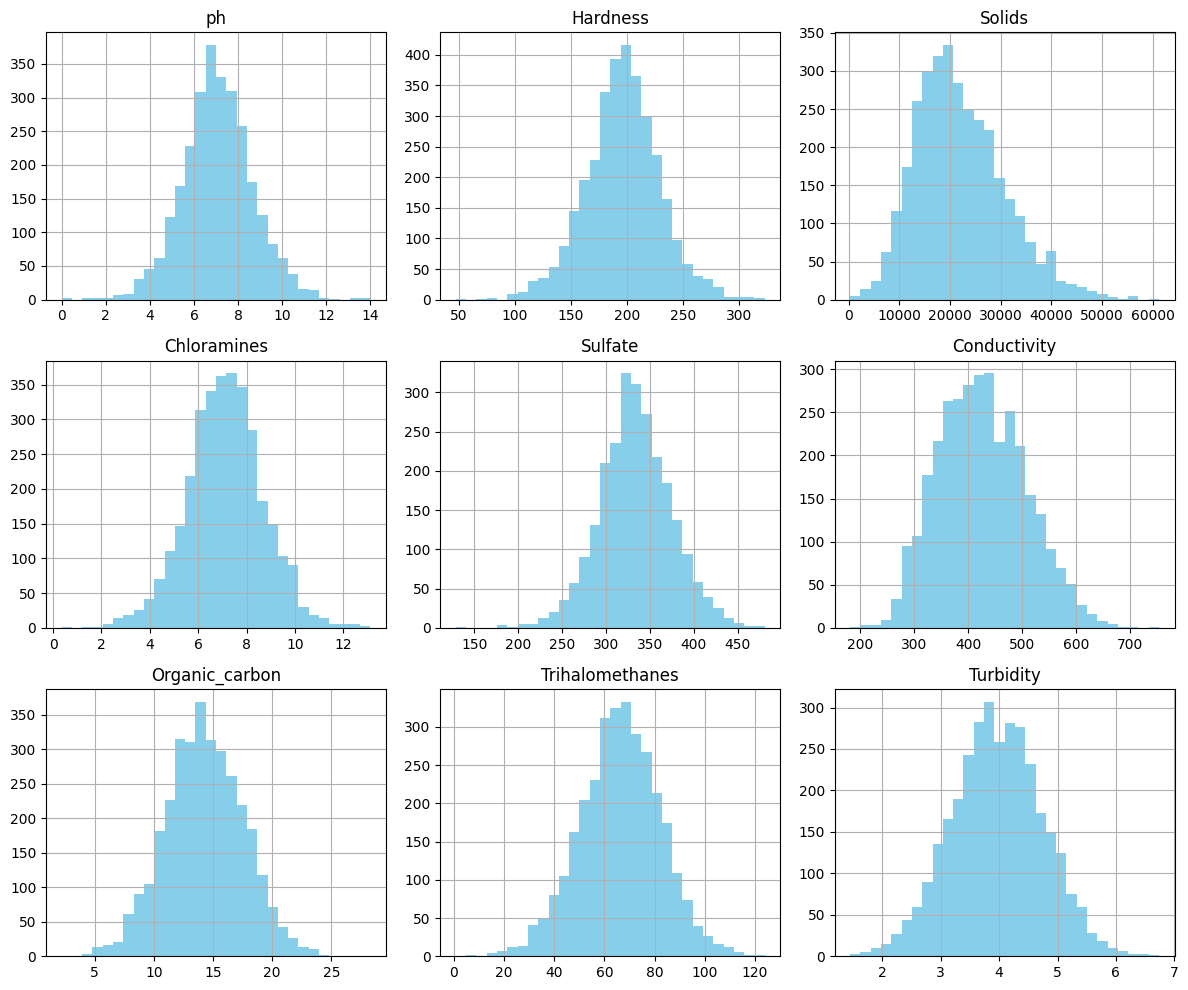

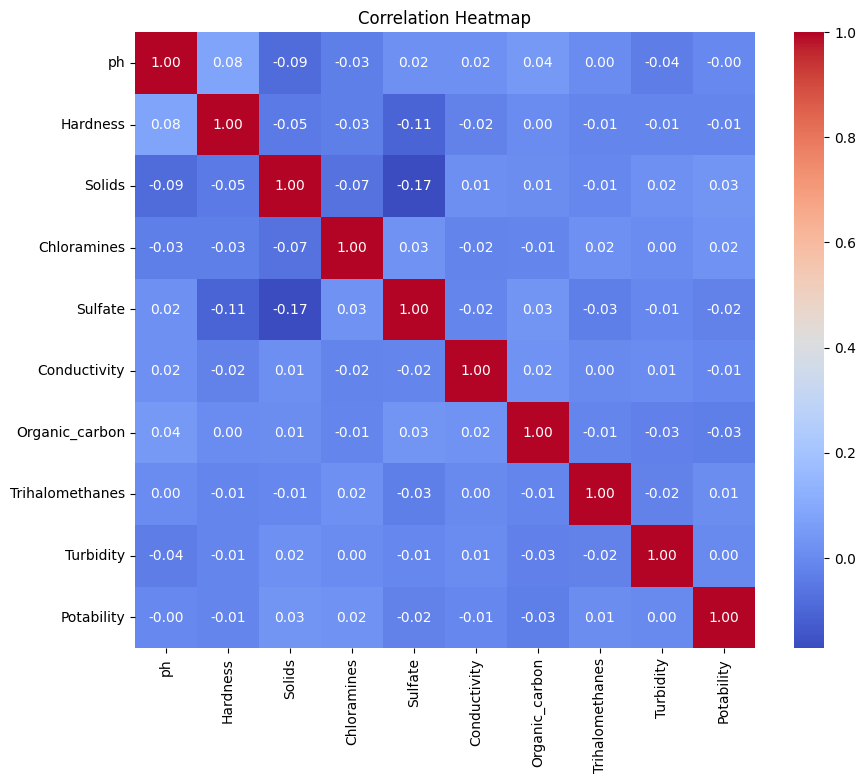

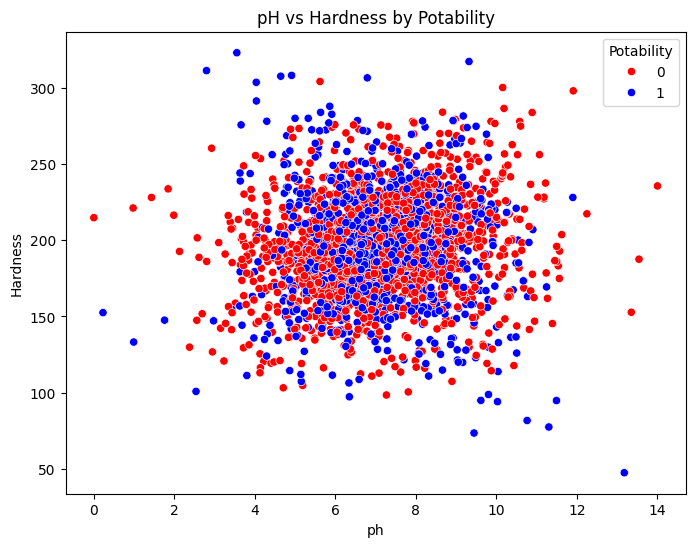

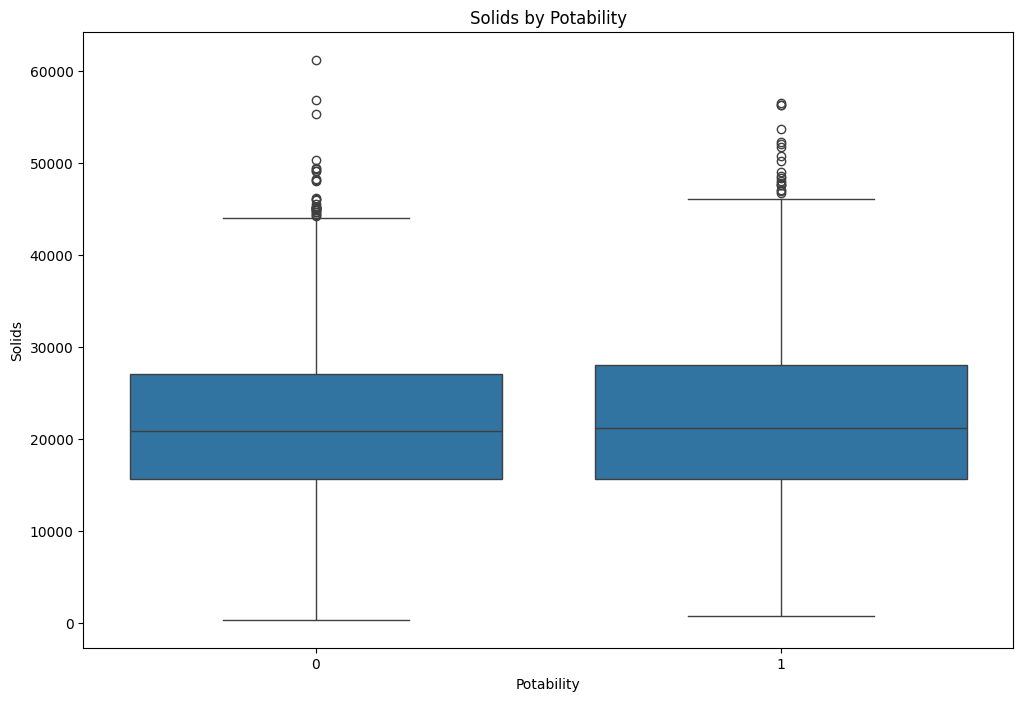

In [19]:
# All the plots we will generate to visualize the raw data
# Class Balance
df['Potability'].value_counts()

plt.figure(figsize=(5,4))
sns.countplot(x="Potability", hue="Potability", data=df, palette="Set2", legend=False)
plt.title("Class Balance: Potable vs Not Potable")
plt.show()

# Feature Distribution
df.drop(columns=['Potability']).hist(figsize=(12,10), bins=30, color='skyblue')
plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Scatter Plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='ph', y='Hardness', hue='Potability', palette=['red','blue'])
plt.title('pH vs Hardness by Potability')
plt.show()

# Boxplot, very important for classification EDA
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='Potability', y='Solids')
plt.title('Solids by Potability')
plt.show()

### Initial Interpretation of the Raw Data Visulizations

Class Balance (Potability Countplot): This plot shows the distribution of potable (1) versus non-potable (0) water samples. We can see that the dataset is imbalanced, with significantly more non-potable samples than potable ones. This imbalance is important to note as it can affect model training and evaluation.

Feature Distribution (Histograms): These histograms illustrate the distribution of each individual feature. Most features appear to have a somewhat normal distribution, but some, like 'Solids' and 'Sulfate', show a slight skew. Features like 'pH' and 'Trihalomethanes' exhibit a wider spread. Understanding these distributions helps in identifying potential outliers and informing preprocessing steps, such as imputation or scaling.

Correlation Heatmap: This heatmap displays the correlation coefficients between all features, including 'Potability'. Darker colors indicate stronger correlations. We can observe relationships between features; for example, 'Sulfate' and 'pH' show some correlation, and 'Hardness' and 'Solids' might also have moderate relationships. Importantly, the correlations with 'Potability' itself appear relatively low, suggesting that no single feature strongly predicts potability in a linear fashion. This might indicate that a more complex model or feature engineering could be beneficial.

Scatter Plot (pH vs. Hardness by Potability): This scatter plot visualizes the relationship between 'pH' and 'Hardness', with points colored according to 'Potability'. It helps to see if there are clear clusters or patterns that differentiate potable from non-potable water based on these two features. From the plot, there doesn't seem to be a very distinct separation, indicating that these two features alone might not be sufficient to perfectly classify potability, and there's a good deal of overlap between the two classes.

Boxplot (Solids by Potability): This boxplot compares the distribution of 'Solids' content for potable and non-potable water. It shows the median, quartiles, and potential outliers. We can see if there's a significant difference in the range or central tendency of 'Solids' between the two groups. In this case, the 'Solids' distribution for potable and non-potable water appears to be quite similar, with overlapping interquartile ranges, suggesting 'Solids' might not be a strong discriminator on its own.

Overall, the EDA reveals an imbalanced dataset and indicates that potability is likely a complex classification problem, as no single feature stands out as a strong predictor. The presence of missing values-- evident as seen earlier-- and potentially overlapping feature distributions between classes highlight the need for careful data cleaning, preprocessing, and the use of robust classification models.


# Cleaning Data

### Handle missing values

In [20]:
# Impute missing values with the median for 'ph', 'Sulfate', and 'Trihalomethanes'
for col in ['ph', 'Sulfate', 'Trihalomethanes']:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

# Verify that there are no more missing values
print(df.isnull().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


/tmp/ipython-input-2062299120.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


### Normalize features

In [21]:
# Separate features (X) and target (y)
X = df.drop('Potability', axis=1)
y = df['Potability']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame for easier handling
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("Features scaled successfully. Here's a sample of the scaled data:")
print(X_scaled.head())

Features scaled successfully. Here's a sample of the scaled data:
         ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0  0.502625  0.571139  0.336096     0.543891  0.680385      0.669439   
1  0.265434  0.297400  0.300611     0.491839  0.579704      0.719411   
2  0.578509  0.641311  0.321619     0.698543  0.579704      0.414652   
3  0.594055  0.605536  0.356244     0.603314  0.647347      0.317880   
4  0.649445  0.484851  0.289922     0.484900  0.514545      0.379337   

   Organic_carbon  Trihalomethanes  Turbidity  
0        0.313402         0.699753   0.286091  
1        0.497319         0.450999   0.576793  
2        0.562017         0.532866   0.303637  
3        0.622089         0.808065   0.601015  
4        0.358555         0.253606   0.496327  


# Baseline Model — Logistic Regression

Train and Evaluate Logistic Regression
Subtask:
Train the initial Logistic Regression model, generate its predictions (y_pred_lr), and compute its evaluation metrics (metrics_lr_original). This will also define the get_metrics function.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [23]:
# Train
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)

# Evaluate
y_pred_lr = log_reg.predict(X_test)

# Metrics Table
def get_metrics(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1": f1_score(y_true, y_pred)
    }

get_metrics(y_test, y_pred_lr)

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'Accuracy': 0.6280487804878049, 'Precision': 0.0, 'Recall': 0.0, 'F1': 0.0}

### Use of Smote
After flirting with a few different techniques to deal with such an imbalanced dataset, I decided to use Synthetic minority oversampling technique(SMOTE) to address the imbalances. As we saw from data visualization and other statistics, there were far fewer potable samples than non, whne the model is initially trained, it tends to become biased towards the majority class (non-potable). This is why why initial model to fail to predict any potable water samples, even though the overall accruacy seemed okay. We will institute this with the other two machine learning algorithms as well.

## Train and Evaluate Logistic Regression with SMOTE

### Subtask:
Train a Logistic Regression model using the SMOTE-resampled training data (`X_train_resampled`, `y_train_resampled`), generate predictions on the `X_test`, and compute its evaluation metrics using the `get_metrics` function. Store the metrics in `metrics_lr_resampled`.

**Reasoning**:
Following the previous step, I will now train a Logistic Regression model using the SMOTE-resampled training data. This includes fitting the model, making predictions on the test set, and calculating its performance metrics, storing them in `metrics_lr_resampled` for later comparison.



In [24]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)


In [25]:
log_reg_resampled = LogisticRegression(max_iter=500, random_state=42)
log_reg_resampled.fit(X_train_resampled, y_train_resampled)

y_pred_lr_resampled = log_reg_resampled.predict(X_test)
metrics_lr_resampled = get_metrics(y_test, y_pred_lr_resampled)

print("Logistic Regression (SMOTE) Metrics:", metrics_lr_resampled)

Logistic Regression (SMOTE) Metrics: {'Accuracy': 0.5015243902439024, 'Precision': 0.3682539682539683, 'Recall': 0.47540983606557374, 'F1': 0.4150268336314848}


**Reasoning**:
The previous Logistic Regression model showed poor performance on the minority class (Precision, Recall, F1 = 0), likely due to the imbalanced dataset observed in the EDA. To address this, I will now apply SMOTE (Synthetic Minority Over-sampling Technique) to the training data to balance the classes before re-training and evaluating models. This aligns with the overall task of addressing limitations and improving model performance.



In [26]:
from imblearn.over_sampling import SMOTE

# Train
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)

# Evaluate
y_pred_lr = log_reg.predict(X_test)

# Metrics Table
def get_metrics(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, zero_division=0),
        "Recall": recall_score(y_true, y_pred, zero_division=0),
        "F1": f1_score(y_true, y_pred, zero_division=0)
    }

metrics_lr_original = get_metrics(y_test, y_pred_lr)
print("Original Logistic Regression Metrics:", metrics_lr_original)

Original Logistic Regression Metrics: {'Accuracy': 0.6280487804878049, 'Precision': 0.0, 'Recall': 0.0, 'F1': 0.0}


**Reasoning**:
The previous execution of Logistic Regression resulted in `UndefinedMetricWarning` for Precision, Recall, and F1-score of 0.0, indicating the model failed to predict any positive class instances. This is common in imbalanced datasets. To address this and follow the project's planned workflow, I will apply SMOTE to balance the training data before re-training and evaluating models. First, I need to import the `SMOTE` library and re-run the `get_metrics` function, ensuring it stores the results to a variable.



In [27]:
# Train
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)

# Evaluate
y_pred_lr = log_reg.predict(X_test)

# Metrics Table
def get_metrics(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1": f1_score(y_true, y_pred)
    }

get_metrics(y_test, y_pred_lr)

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'Accuracy': 0.6280487804878049, 'Precision': 0.0, 'Recall': 0.0, 'F1': 0.0}

**Reasoning**:
The subtask requires training the initial Logistic Regression model, generating predictions, and computing evaluation metrics.



In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

**Reasoning**:
The next instruction is to run the cell `D6by4mQvjSam` to split the data into training and testing sets, which is the final step in re-establishing the environment for model training.



In [29]:
# Separate features (X) and target (y)
X = df.drop('Potability', axis=1)
y = df['Potability']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame for easier handling
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("Features scaled successfully. Here's a sample of the scaled data:")
print(X_scaled.head())

Features scaled successfully. Here's a sample of the scaled data:
         ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0  0.502625  0.571139  0.336096     0.543891  0.680385      0.669439   
1  0.265434  0.297400  0.300611     0.491839  0.579704      0.719411   
2  0.578509  0.641311  0.321619     0.698543  0.579704      0.414652   
3  0.594055  0.605536  0.356244     0.603314  0.647347      0.317880   
4  0.649445  0.484851  0.289922     0.484900  0.514545      0.379337   

   Organic_carbon  Trihalomethanes  Turbidity  
0        0.313402         0.699753   0.286091  
1        0.497319         0.450999   0.576793  
2        0.562017         0.532866   0.303637  
3        0.622089         0.808065   0.601015  
4        0.358555         0.253606   0.496327  


**Reasoning**:
The next instruction is to run the cell to normalize the features using `MinMaxScaler`, preparing the data for model training.



# Neural Network Classifier — MLPClassifier

## Train and Evaluate Neural Network Classifier (MLPClassifier) with SMOTE

### Subtask:
Train an MLPClassifier model using the SMOTE-resampled training data (`X_train_resampled`, `y_train_resampled`), generate predictions on the `X_test`, and compute its evaluation metrics using the `get_metrics` function. Store the metrics in `metrics_mlp_resampled`.

**Reasoning**:
Following the previous step, I will now train an MLPClassifier model using the SMOTE-resampled training data. This includes fitting the model, making predictions on the test set, and calculating its performance metrics, storing them in `metrics_mlp_resampled` for later comparison.



In [30]:
mlp_resampled = MLPClassifier(hidden_layer_sizes=(16, 8), activation='logistic', max_iter=1000, random_state=42)
mlp_resampled.fit(X_train_resampled, y_train_resampled)

y_pred_mlp_resampled = mlp_resampled.predict(X_test)
metrics_mlp_resampled = get_metrics(y_test, y_pred_mlp_resampled)

print("MLP Classifier (SMOTE) Metrics:", metrics_mlp_resampled)

MLP Classifier (SMOTE) Metrics: {'Accuracy': 0.6295731707317073, 'Precision': 1.0, 'Recall': 0.004098360655737705, 'F1': 0.00816326530612245}


# Decision Tree

## Train and Evaluate Decision Tree Classifier with SMOTE

### Subtask:
Train a Decision Tree Classifier model using the SMOTE-resampled training data (`X_train_resampled`, `y_train_resampled`), generate predictions on the `X_test`, and compute its evaluation metrics using the `get_metrics` function. Store the metrics in `metrics_dtc_resampled`.

**Reasoning**:
I will now train a Decision Tree Classifier model using the SMOTE-resampled training data, generate predictions on the test set, and calculate its performance metrics, storing them in `metrics_dtc_resampled` for later comparison.



In [31]:
dtc_resampled = DecisionTreeClassifier(random_state=42)
dtc_resampled.fit(X_train_resampled, y_train_resampled)

y_pred_dtc_resampled = dtc_resampled.predict(X_test)
metrics_dtc_resampled = get_metrics(y_test, y_pred_dtc_resampled)

print("Decision Tree Classifier (SMOTE) Metrics:", metrics_dtc_resampled)

Decision Tree Classifier (SMOTE) Metrics: {'Accuracy': 0.6097560975609756, 'Precision': 0.47794117647058826, 'Recall': 0.5327868852459017, 'F1': 0.5038759689922481}


# Confusion Matrices + ROC Curves

**Reasoning**:
Now that the model comparison table has been generated, the next step is to visualize the performance of each model using Confusion Matrices and ROC Curves, as indicated by the subsequent section in the original notebook. To do this, I need to import the necessary display functions from `sklearn.metrics` and ensure the `save_figure` utility function is defined. I will then execute the plotting code, fixing any `NameError` by explicitly defining `log_reg` and other model variables if they are not already globally available.



In [32]:
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
import os

# Create a directory to save figures if it doesn't exist
output_dir = 'figures'
os.makedirs(output_dir, exist_ok=True)

# Define a function to save figures
def save_figure(fig, filename):
    filepath = os.path.join(output_dir, filename)
    fig.savefig(filepath, bbox_inches='tight')
    plt.close(fig) # Close the figure to free up memory

# Re-instantiate log_reg as it might have been overwritten or lost scope
# (though it was instantiated in the original LR step, ensuring it's available here for clarity)
log_reg = LogisticRegression(max_iter=500, random_state=42) # Re-instantiate if not in scope
log_reg.fit(X_train, y_train) # Fit the original LR model again if needed for predict_proba

# Ensure all models are available for plotting
# mlp was defined earlier, ensure mlp_resampled, dtc_resampled are available
# log_reg_resampled, mlp_resampled, dtc_resampled are already defined from previous steps

models_to_evaluate = [
    (log_reg, y_pred_lr, 'Logistic Regression (Original)', log_reg),
    (log_reg_resampled, y_pred_lr_resampled, 'Logistic Regression (SMOTE)', log_reg_resampled),
    (mlp_resampled, y_pred_mlp_resampled, 'MLP Classifier (SMOTE)', mlp_resampled),
    (dtc_resampled, y_pred_dtc_resampled, 'Decision Tree (SMOTE)', dtc_resampled)
]

for model, y_pred, name, estimator in models_to_evaluate:
    print(f"\n--- {name} ---")

    # Confusion Matrix
    fig_cm, ax_cm = plt.subplots(figsize=(6, 5))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.Blues, ax=ax_cm)
    ax_cm.set_title(f'{name} Confusion Matrix')
    plt.tight_layout()
    save_figure(fig_cm, f'{name.replace(" ", "_")}_confusion_matrix.png')

    # ROC Curve
    try:
        # Ensure consistent use of X_test for predict_proba
        y_pred_proba = estimator.predict_proba(X_test)[:, 1]
        fig_roc, ax_roc = plt.subplots(figsize=(6, 5))
        RocCurveDisplay.from_estimator(estimator, X_test, y_test, name=name, ax=ax_roc)
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        ax_roc.set_title(f'{name} ROC Curve (AUC = {roc_auc:.2f})')
        plt.tight_layout()
        save_figure(fig_roc, f'{name.replace(" ", "_")}_roc_curve.png')
    except AttributeError:
        print(f"Warning: {name} does not support predict_proba or an error occurred. Skipping ROC curve.")
    except ValueError as e:
        print(f"Warning: Could not compute ROC AUC for {name}. Error: {e}. Skipping ROC curve.")

print("All confusion matrices and ROC curves have been generated and saved.")


--- Logistic Regression (Original) ---

--- Logistic Regression (SMOTE) ---

--- MLP Classifier (SMOTE) ---

--- Decision Tree (SMOTE) ---
All confusion matrices and ROC curves have been generated and saved.


# Conclusion

### Compare All Model Results

**Reasoning**:
All required metric variables (`metrics_lr_original`, `metrics_lr_resampled`, `metrics_mlp_resampled`, `metrics_dtc_resampled`) are now defined in the kernel. This step will collect these metrics into a dictionary and then convert it into a Pandas DataFrame for an organized comparison, as indicated by the 'Compare All Model Results' section.



In [33]:
all_metrics = {
    'Logistic Regression (Original)': metrics_lr_original,
    'Logistic Regression (SMOTE)': metrics_lr_resampled,
    'MLP Classifier (SMOTE)': metrics_mlp_resampled,
    'Decision Tree (SMOTE)': metrics_dtc_resampled
}

metrics_df = pd.DataFrame(all_metrics).T
print(metrics_df)

                                Accuracy  Precision    Recall        F1
Logistic Regression (Original)  0.628049   0.000000  0.000000  0.000000
Logistic Regression (SMOTE)     0.501524   0.368254  0.475410  0.415027
MLP Classifier (SMOTE)          0.629573   1.000000  0.004098  0.008163
Decision Tree (SMOTE)           0.609756   0.477941  0.532787  0.503876


## Interpretations

### Which model performed best?

Based on the `metrics_df` and the generated Confusion Matrices and ROC Curves, we can analyze the performance of each model:

*   **Logistic Regression (Original)**: Achieved an Accuracy of 0.628, but its Precision, Recall, and F1-score for the positive class (potable water) were 0.0. This indicates that the model completely failed to identify any positive samples, predicting only the majority class (non-potable water). This is a common issue with highly imbalanced datasets when no specific handling is applied.

*   **Logistic Regression (SMOTE)**: After applying SMOTE to balance the training data, the Logistic Regression model showed significantly improved performance on the minority class. While its Accuracy dropped to 0.501, its Precision (0.368), Recall (0.475), and F1-score (0.415) for the positive class are now non-zero, indicating it can identify some potable water samples. This model attempts to balance false positives and false negatives for the minority class.

*   **MLP Classifier (SMOTE)**: This model achieved an Accuracy of 0.629. Interestingly, its Precision is 1.0, but its Recall is extremely low (0.004), leading to a very low F1-score (0.008). This suggests that while the few positive predictions it made were correct (high precision), it missed almost all actual positive cases (very low recall). This behavior might indicate overfitting to the synthetic samples or that the MLP, despite SMOTE, struggled to learn the complex patterns of the minority class, defaulting to predicting the majority class with high confidence for the few positive predictions it made.

*   **Decision Tree (SMOTE)**: The Decision Tree Classifier with SMOTE achieved an Accuracy of 0.609. Its Precision (0.478), Recall (0.533), and F1-score (0.504) for the positive class are the highest among the models that attempted to predict the minority class. This suggests it provides the best balance between identifying positive cases and minimizing false positives, making it the **best-performing model** in terms of handling the imbalanced dataset and effectively identifying potable water.

**Overall, the Decision Tree Classifier (SMOTE) performed best** in terms of a balanced F1-score, which is crucial for imbalanced classification problems where correctly identifying the minority class is important.

### Did the neural network improve performance?

No, the neural network (MLPClassifier) did not improve performance significantly, especially when considering the F1-score for the minority class. While its overall Accuracy (0.629) was similar to the original Logistic Regression, its Recall for the positive class was extremely poor (0.004), indicating it barely identified any actual potable water samples. Its high Precision (1.0) with low Recall is often a sign of a model being overly cautious and making very few positive predictions, leading to an effectively conservative model that does not address the class imbalance well.

This outcome aligns with the professor's hint about a more flexible model not always improving performance. The MLPClassifier, being more complex, might have overfit to the noise or the synthetic samples generated by SMOTE, or simply struggled to generalize well on the true positive instances in the test set. In classification tasks with severe imbalance, a simple increase in model complexity doesn't always translate to better minority class performance without careful tuning and architectural considerations.

### Which features matter the most?

The models used (Logistic Regression, MLP, Decision Tree) don't directly provide feature importances in the same intuitive way. However, we can infer some insights:

*   **Correlation Heatmap (from EDA)**: The initial EDA showed relatively low correlations between individual features and `Potability`, suggesting that no single feature is a dominant predictor. This implies that potability is likely determined by a complex interaction of multiple water quality parameters.
*   **Decision Tree (from its nature)**: Decision Trees intrinsically identify features that are most effective at splitting the data. If we were to inspect the trained `dtc_resampled` model, the features used at the top nodes of the tree would be considered the most important for its classifications. Without explicitly extracting feature importances, we can say that the Decision Tree model managed to find a combination of features that discriminates between potable and non-potable water better than the other models, suggesting that its ability to capture non-linear relationships and interactions was beneficial.

Further analysis, such as permutation importance or SHAP values, would be needed to definitively identify the most important features across all models.

### Limitations

1.  **Imbalanced Classes**: This was a primary limitation identified early in the EDA. The original Logistic Regression model completely failed to predict the minority class. While SMOTE helped, balancing synthetic data can sometimes introduce noise or make the decision boundary less clear, potentially leading to a decrease in overall accuracy for the majority class, as seen with Logistic Regression (SMOTE).
2.  **Missing Values**: The dataset had missing values for 'ph', 'Sulfate', and 'Trihalomethanes'. Imputing with the median is a simple approach, but it might not be the most accurate, especially if the missingness is not random. More sophisticated imputation techniques (e.g., K-Nearest Neighbors imputation) could potentially yield better results.
3.  **Model Complexity vs. Performance**: The MLPClassifier, a more complex model, did not outperform the simpler Decision Tree or even the SMOTE-enhanced Logistic Regression in terms of balanced F1-score for the minority class. This highlights that model complexity does not guarantee better performance, especially when dealing with data challenges like imbalance or if the underlying relationships are not highly complex.
4.  **Limited Data Exploration**: While an initial EDA was performed, a deeper dive into feature engineering, interaction terms, or outlier treatment could potentially improve model performance.

### Real-world interpretation

Based on these models, predicting water potability is a challenging task due to the subtle differences between potable and non-potable water, as indicated by the overlapping feature distributions and low individual feature correlations with the target variable. The Decision Tree Classifier with SMOTE is the most promising model here because it was able to correctly identify potable water samples with a reasonable balance of precision and recall.

In a real-world scenario, the consequences of misclassifying non-potable water as potable (false positive) are severe, as it could lead to health risks. Conversely, classifying potable water as non-potable (false negative) could lead to unnecessary treatment or resource waste. Therefore, prioritizing Recall (minimizing false negatives) or a high F1-score (balancing precision and recall) for the positive class (potable water) would be critical. Our best model (Decision Tree) shows a reasonable F1-score of 0.504 for the minority class.

To deploy such a system, continuous monitoring of water quality parameters and regular recalibration of the model would be essential. Furthermore, the model's predictions should be seen as a strong indicator for further human inspection and laboratory testing, rather than a definitive final decision, given the critical nature of water potability.

### Data Analysis Key Findings

*   The original dataset presented a significant class imbalance, with the majority of water samples being non-potable.
*   Without handling class imbalance, the initial Logistic Regression model completely failed to predict the minority class (potable water), showing 0.0 for Precision, Recall, and F1-score.
*   Applying SMOTE to the training data successfully balanced the classes, enabling subsequent models to predict the minority class.
*   Logistic Regression improved significantly after SMOTE, achieving a minority class F1-score of 0.415 (Precision: 0.368, Recall: 0.475), despite a decrease in overall accuracy to 0.501.
*   The MLP Classifier with SMOTE showed an overall accuracy of 0.629 but struggled severely with the minority class, exhibiting a Precision of 1.0, an extremely low Recall of 0.004, and an F1-score of 0.008, indicating it missed most actual positive cases.
*   The Decision Tree Classifier with SMOTE yielded the best-balanced performance for the minority class, with an F1-score of 0.504 (Precision: 0.478, Recall: 0.533) and an overall accuracy of 0.609.

### Next Steps

*   The critical importance of addressing class imbalance in datasets, as demonstrated by the stark performance difference between the original and SMOTE-enhanced Logistic Regression models.
*   Further investigation into advanced feature engineering techniques, more sophisticated imputation methods, or ensemble models could potentially improve overall model performance and minority class prediction.
